In [5]:
import cv2
import numpy as np
import os
import sys
from PIL import Image
import matplotlib.pyplot as plt

2560000
(800, 800, 4)
uint8


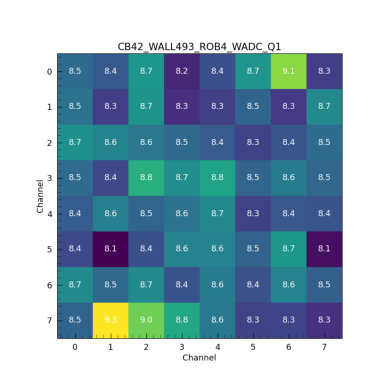

In [6]:
img_path = "img/CB42_WALL493_ROB4_WADC_Q1_hist2D.png"
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
if img is None:
    print(f"Error: Unable to read image '{img_path}'")
    sys.exit(1)
print(img.size)
print(img.shape)
print(img.dtype)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGB))  # 转换颜色通道顺序
plt.axis("off")  # 关闭坐标轴
plt.show()

In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)  # 转换为BGR格式
print(img[:2])
mask = np.zeros(img.shape[:2], dtype=np.uint8)  # 创建掩膜
print(mask)
# 使用OpenCV的GrabCut算法分割前景
bgd_model = np.zeros((1, 65), np.float64)  # 背景模型
fgd_model = np.zeros((1, 65), np.float64)  # 前景模型
print(bgd_model.shape)
print(fgd_model.shape)
print(bgd_model)
print(fgd_model)
print(mask.shape)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1, 65)
(1, 65)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(800, 800)


In [19]:
rect = (50, 100, 450, 290)  # 定义初始矩形区域
cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 1.74679271e-01,  4.69223510e-01,  2.89927442e-01,
          3.49676178e-02,  3.12021584e-02,  1.40071731e+02,
          1.36128757e+02,  3.60231739e+01,  2.55000000e+02,
          2.55000000e+02,  2.55000000e+02,  1.34179794e+02,
          7.77243306e+01,  5.77546116e+01,  6.95009770e+01,
          2.12453552e+02,  1.57652231e+02,  1.42669863e+02,
          1.35843928e+02,  1.27382812e+02,  9.27122924e+00,
         -3.94721862e+01,  5.98448831e+00, -3.94721862e+01,
          2.01608061e+02, -4.24810838e+01,  5.98448831e+00,
         -4.24810838e+01,  1.30355242e+01,  1.00000000e-02,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e-02,  1.70130169

In [20]:
# 提取前景
mask = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
segmented = img * mask[:, :, np.newaxis]

In [21]:
# 保存图片
output_path = "img/segmented_image.png"
cv2.imwrite(output_path, segmented)

True